# Library & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
url = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_opini_film.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [4]:
data.describe()

,Id
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


# PRE-PROCESSING

In [5]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Apply preprocessing
data['Text_Clean'] = data['Text Tweet'].apply(preprocess_text)

In [6]:
data.head()

,Id,Sentiment,Text Tweet,Text_Clean
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...
1,2,negative,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,beexkuanlin sepanjang film gwa berkata kasar t...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,ane ga suka fast and furiousmenurutku kok jele...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun36 kan gua ga tau film nya lu bilang p...


In [7]:
# Tokenisasi Teks
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['Text_Clean'])
word_index = tokenizer.word_index

In [8]:
# Mengubah Teks Menjadi Sequences dan Melakukan Padding
sequences = tokenizer.texts_to_sequences(data['Text_Clean'])
X = pad_sequences(sequences, maxlen=100, padding='post')

X

array([[ 14,  26, 218, ...,   0,   0,   0],
       [  1, 106, 107, ...,   0,   0,   0],
       [369, 220,   1, ...,   0,   0,   0],
       ...,
       [ 69,   1,   5, ...,   0,   0,   0],
       [  1,   4, 202, ...,   0,   0,   0],
       [131,  69,   1, ...,   0,   0,   0]], dtype=int32)

In [9]:
# Encoding Label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])
y = to_categorical(y, num_classes = 2)

In [10]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Membangun Model

In [11]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=100),
    LSTM(128),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Uji Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.5323 - loss: 0.6929 - val_accuracy: 0.4688 - val_loss: 0.6951
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.4083 - loss: 0.6990 - val_accuracy: 0.5312 - val_loss: 0.6929
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.4917 - loss: 0.6932 - val_accuracy: 0.4688 - val_loss: 0.6940
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5198 - loss: 0.6933 - val_accuracy: 0.4688 - val_loss: 0.6933
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4479 - loss: 0.6932 - val_accuracy: 0.5312 - val_loss: 0.6930
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.4781 - loss: 0.6945 - val_accuracy: 0.5312 - val_loss: 0.6922
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5125 - loss: 0.6936 - val_accuracy: 0.5312 - val_loss: 0.6919
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5260 - loss: 0.6938 - val_accuracy: 0.5312 - val_loss:

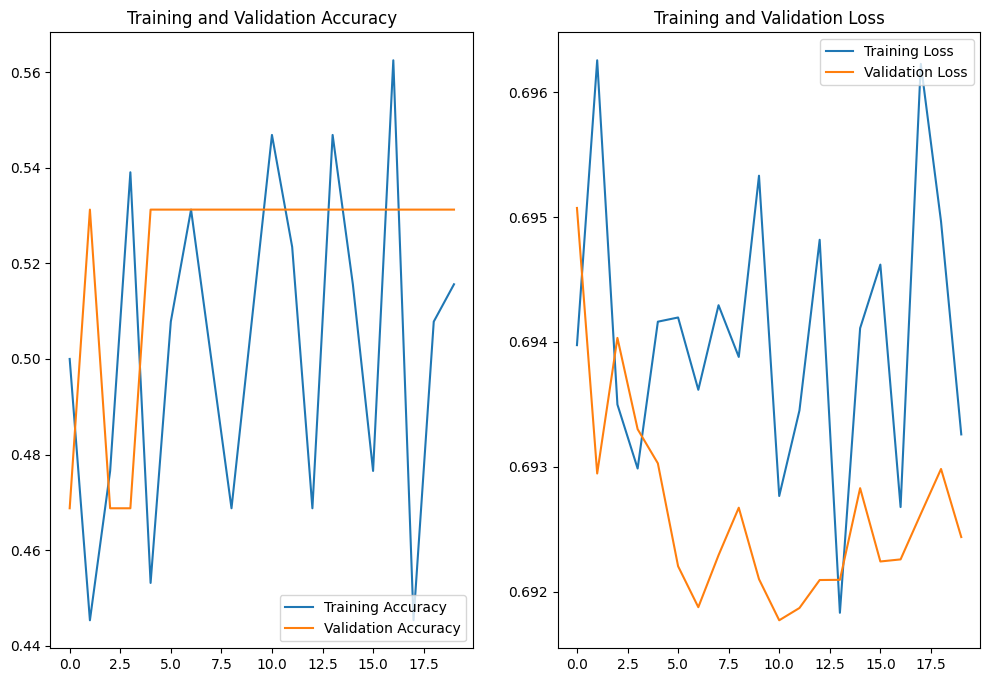

In [14]:
# Memplot akurasi dan loss pelatihan dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4667 - loss: 0.6941 
Test Accuracy: 0.44999998807907104
Test Loss: 0.6945017576217651


In [16]:
# Prediksi Data Baru
new_texts = ["Produk ini sangat bagus banget", "Produk ini jelek"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=10, padding='post')
predictions = model.predict(new_X)

predictions = model.predict(new_X)
predicted_labels = ['positive' if pred[1] > 0.5 else 'negative' for pred in predictions]

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
['negative', 'negative']
